# Ruina gracza
Proszę wykonać poprzednie zadania 1, 2, 3, 6 nie dla dwu graczy, ale dla kilku, np. 5, dla kilku różnych wartości $p_i$ (będzie wymagane ustalenie więcej niż jednego prawdopodobieństwa) przy sugerowanych kapitałach początkowych $a_i$ = 20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1

In [2]:
def single_game(players_fortune, players_probs):   
    if len(players_fortune) != len(players_probs):
        print("Players number not equal probs number")
        return
        
    while np.sum([x > 0 for x in players_fortune]) > 1:
        random = np.random.uniform(0, 1)
        section = 0

        for i, p in enumerate(players_probs):
            if players_fortune[i] == 0:
                continue
                
            section += p
            if random <= section:
                losers_prob = 0
                
                for fortune_index in range(len(players_fortune)):
                    if i != fortune_index and players_fortune[fortune_index] != 0:
                        players_fortune[fortune_index] -= 1
                        players_fortune[i] += 1
                        
                        if players_fortune[fortune_index] == 0:
                            losers_prob += players_probs[fortune_index]
                            players_probs[fortune_index] = 0
                    
                if losers_prob > 0:
                    new_prob = losers_prob / np.sum([x > 0 for x in players_probs])
                    for prob_index in range(len(players_probs)):
                        if players_probs[prob_index] != 0:
                            players_probs[prob_index] += new_prob
                break
                                    
    return [x > 0 for x in players_fortune]

In [3]:
def simulation(game_num, players_fortune, players_probs):
    wins = np.zeros(len(players_fortune))
    
    for i in range(game_num):
        wins += single_game(players_fortune.copy(), players_probs.copy())
        
    return (game_num - wins) / game_num

In [4]:
def calc_avg_probs(game_num, players_fortune, probs):
    avg_probs = []
    for p in probs:
        players_probs = [p]
        other_players_p = (1 - p) / (len(players_fortune) - 1)
        
        for i in range(len(players_fortune) - 1):
            players_probs.append(other_players_p)
                
        avg_probs.append(simulation(game_num, players_fortune, players_probs))
    return np.array(avg_probs)

In [5]:
players_fortune = [20, 20, 20, 20, 20]
game_num = 10
first_player_probs = np.arange(0, 1, 0.02)

In [6]:
avg_probs = calc_avg_probs(game_num, players_fortune, first_player_probs)

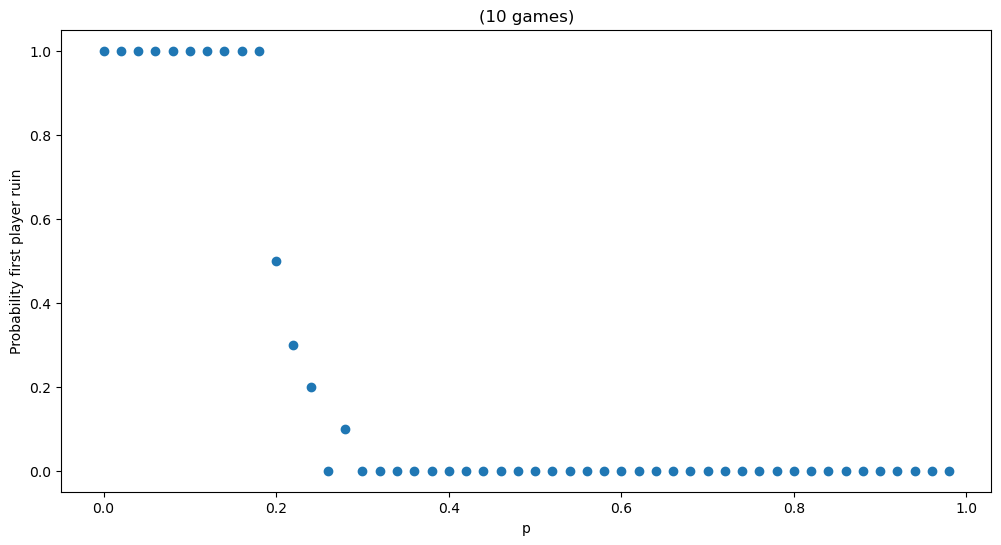

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(first_player_probs, avg_probs[:, 0])
plt.xlabel('p')
plt.ylabel('Probability first player ruin')
plt.title(f'({game_num} games)')
plt.show()

In [8]:
game_num = 500
first_player_probs = np.arange(0, 1.01, 0.04)

In [9]:
avg_probs = calc_avg_probs(game_num, players_fortune, first_player_probs)

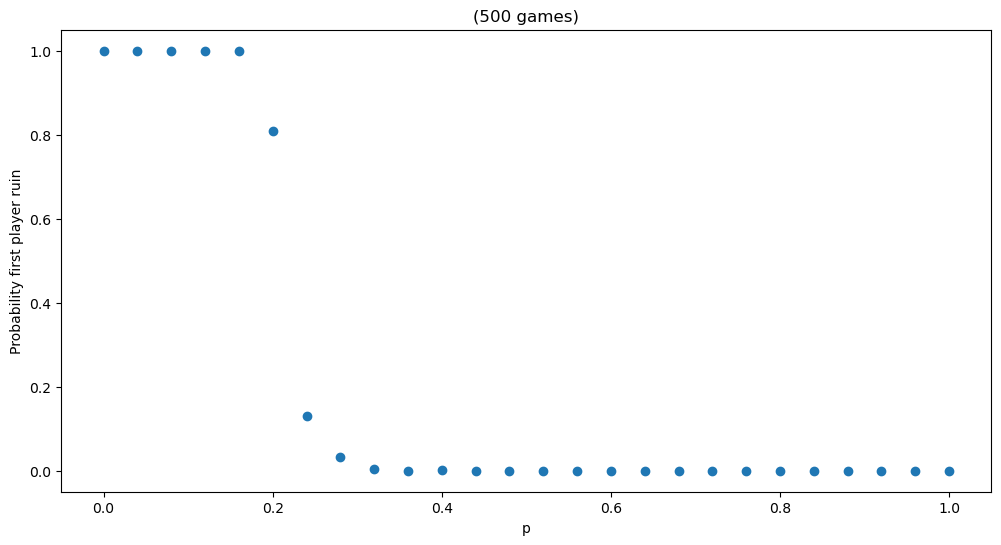

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(first_player_probs, avg_probs[:, 0])
plt.xlabel('p')
plt.ylabel('Probability first player ruin')
plt.title(f'({game_num} games)')
plt.show()